In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [21]:
df = pd.read_excel(u'../data/全部A股上市公司所属行业.xlsx')

In [22]:
df.head()

,SecuCode,SecuAbbr,TotalMV,FirstIndustryName,SecondIndustryName,ThirdIndustryName,是否中证800
0,601398,工商银行,2.052900e+08,银行,国有银行,国有银行,是
1,601939,建设银行,1.785078e+08,银行,国有银行,国有银行,是
2,601318,中国平安,1.536820e+08,非银行金融,保险,保险,是
3,600519,贵州茅台,1.409868e+08,食品饮料,白酒,白酒,是
4,601288,农业银行,1.263439e+08,银行,国有银行,国有银行,是


In [23]:
# df = df[df[u'是否中证800'] == u'是']

In [24]:
df.shape

(3630, 7)

In [25]:
theme_df = pd.read_excel(u'../data/行业分类表.xlsx', sheet_name=u'中信二级行业')

In [26]:
theme_df

,金融地产,可选消费,必选医药,信息科技,其他经济敏感,其他经济不敏感
0,保险,白酒,其他医药医疗,IT服务,油田服务,金属制品
1,证券,白色家电,中药生产,电子设备,运输设备,电站设备
2,股份制与城商行,乘用车,零售,半导体,化学制品,输变电设备
3,房地产开发管理,小家电,生物医药,传媒,建筑施工,合成纤维及树脂
4,国有银行,商用车,品牌服饰,计算机软件,工程机械,航空航天
5,信托及其他,照明设备及其他,其他饮料,新能源设备,普钢,造纸
6,NaN,汽车销售及服务,化学制药,计算机硬件,航空机场,电信运营
7,NaN,黑色家电,食品,增值服务,石油化工,其他军工
8,NaN,其他轻工,NaN,其他元器件,煤炭开采洗选,综合
9,NaN,建筑装修,NaN,汽车零部件,发电及电网,兵器兵装


In [27]:
theme2ind = {}
for key in theme_df.columns:
    theme2ind[key] = [x for x in theme_df[key] if x is not np.nan]

In [28]:
ind2theme = {}
for key, value in theme2ind.items():
    for element in value:
        ind2theme[element] = key

In [29]:
df['Theme'] = [ind2theme[x] for x in df['SecondIndustryName']]

In [30]:
results = df.groupby('Theme')['TotalMV'].sum()

In [31]:
results = results.sort_values(ascending=False)

In [32]:
results

Theme
金融地产       1.870490e+09
信息科技       1.285959e+09
其他经济敏感     1.064704e+09
可选消费       6.446227e+08
必选医药       6.244719e+08
其他经济不敏感    4.998375e+08
Name: TotalMV, dtype: float64

In [33]:
weight = results / results.sum()

In [34]:
weight

Theme
金融地产       0.312264
信息科技       0.214681
其他经济敏感     0.177744
可选消费       0.107615
必选医药       0.104251
其他经济不敏感    0.083444
Name: TotalMV, dtype: float64

([<matplotlib.patches.Wedge at 0x1223c870>,
 [Text(-1.05628,-0.30703,'金融地产'),
  Text(0.39524,-1.02654,'信息科技'),
  Text(1.09952,0.0325254,'其他经济敏感'),
  Text(0.66109,0.879181,'可选消费'),
  Text(-0.0229392,1.09976,'必选医药'),
  Text(-0.63062,0.901287,'其他经济不敏感')],
 [Text(-0.576154,-0.167471,'31.2%'),
  Text(0.215586,-0.559931,'21.5%'),
  Text(0.599738,0.0177411,'17.8%'),
  Text(0.360595,0.479553,'10.8%'),
  Text(-0.0125123,0.59987,'10.4%'),
  Text(-0.343974,0.491611,'8.3%')])

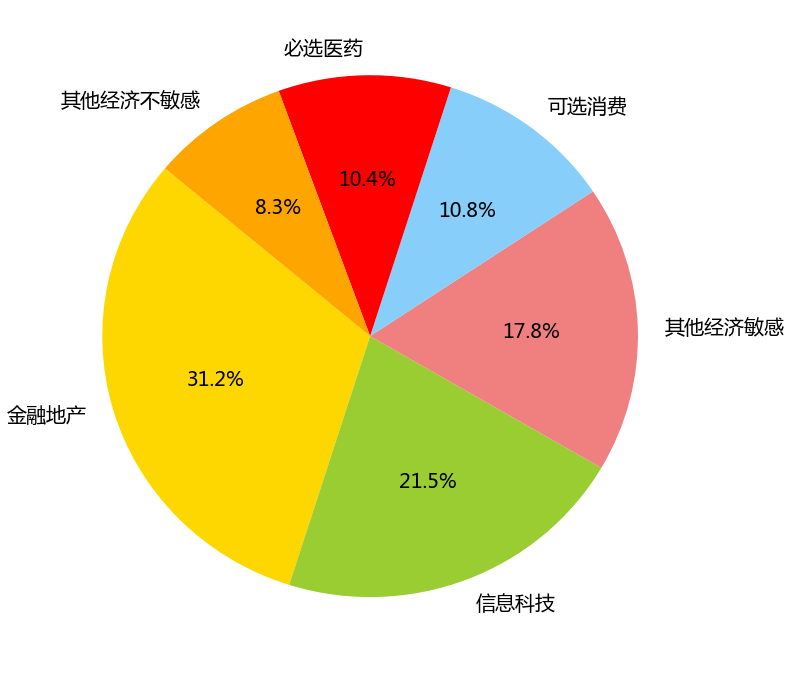

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))

labels = weight.index.tolist()
sizes = weight.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange']

ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 20})

In [36]:
v = df.groupby('SecondIndustryName')['TotalMV'].sum().sort_values(ascending=False)

In [37]:
v /= v.sum()

In [19]:
t = pd.DataFrame({u'行业': v.index, u'占比': v.values})

In [20]:
t.to_excel('C:/Users/zhangyang01/Desktop/ratio.xlsx')